# SVMs - Hard Margin SVC

### Theory

Support vector machines (SVMs) are part of the "bread and butter" machine learning models that are essential in the toolkit of every data scientist or machine learning engineer. In their most basic form, SVMs are used for **binary classification** problems where we need to distinguish between two classes in some feature space. This SVM variant is called a support vector classifier (SVC). The classification task is performed by using a decision boundary that is represented by a hyperplane in the feature space. For educational purposes, SVM concepts are explained using a two-dimensional feature space for easy visualisation. Let us consider the classification problem below,

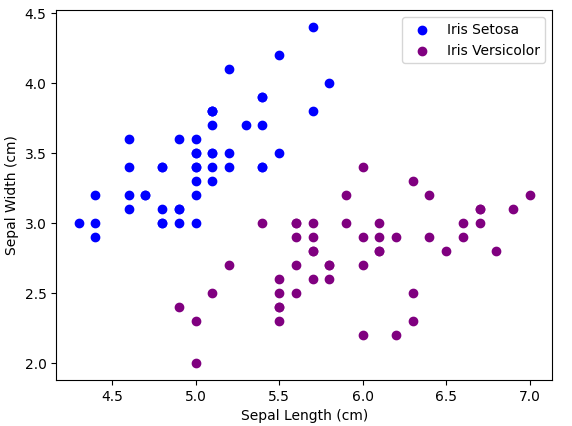

We want to classify flowers as either _setosa_, our positive class, or _versicolor_ which is our negative class. Our features are $X_1$ which is the sepal length and $X_2$ which is the sepal. These features define the feature space where each point $\mathbf{X_i} = (X_{i1}, X_{i2})$ is contained in. **A major assumption of SVMs is that the data is linearly seperable in feature space**. This is definitely the case in our example as we can clearly see two distinct groups in feature space. The consequence of this is that our decision boundary has the equation of a straight line,

$$ W_1 X_1 + W_2 X_2 + b = 0 $$

Notice that our decision boundary is defined by the weights $W_1$ and $W_2$ as well as the bias $b$. These are the parameters of our SVM and we want to determine their optimal values for our classification problem. In a feature space with $N$ number of features such that $X = [X_1, X_2, ..., X_N]$, our decision boundary is a hyperplane when $N > 3$ and is defined by,

$$ W_1 X_1 + W_2 X_2 + ... + W_N X_N b = 0 $$

It is then useful to fine a row vector for the weights $W = [W_1, W_2, ... W_N]$ so we can write,

$$ XW^T + b = 0 $$

Let us return back to our simple situtation. Now we ask ourselves: _But what straight line do we draw?_ Intuitively, we would draw a straight line for the decision boundary that, ideally, perfectly separates both classes. Furthermore, we would draw the line such that we it is a good fit for when we draw more points. In other words, we want a decision boundary with the highest classification accuracy, but which also does not overfit the data. We could achieve this by drawing a line such that there is reasonable space between it and the classification groups. Luckily for us, this is straight-forward in our example, 

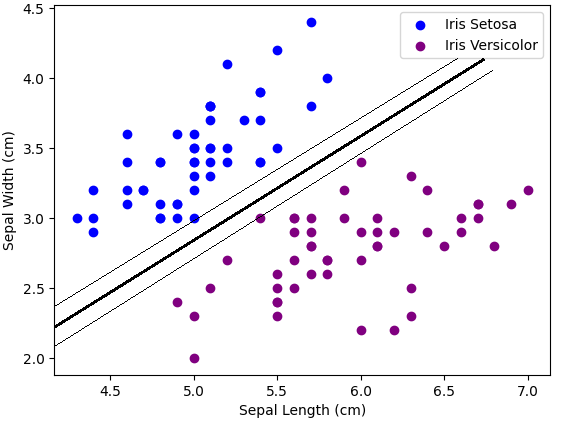

We will also draw to additional lines referred to as our **margins**. Notice that the feature space within the margins are devoid of points. This is a key idea behind a **hard margin** SVR, the constraint that we do not want any points within the margins. To mitigate overfitting, we want to determine the best decision boundary with the largest empty space between its margins. In other words, we want to maximise the margin width $\epsilon$ 

### The Dual Formulation

In this section, we formulate the optimisation problem for a hard margin SVC. Firstly, we need to find the margin width $\epsilon$ in terms of the parameters of our model since our aim is to maximise it. Our first step is to consider the column vectors $\mathbf{X_{+}}$ and $\mathbf{X_{-}}$ which lie on each margin respectively. Regardless of where exactly $\mathbf{X_{+}}$ and $\mathbf{X_{-}}$ lie along their respective margins, their difference vector $\mathbf{X_{+}} - \mathbf{X_{-}}$ will always completely traverse the space between the margins at some angle. This means that our margin width is a projection of this difference vector in the direction that is perpendicular to our hyperplane $XW^T + b = 0$. Let us define the column vector $\mathbf{W}$ (not to be confused with the weights array $W$). Its unit vector $\hat{\mathbf{W}} = \mathbf{W} / ||\mathbf{W}||$ is perpendicular to our hyperplane and allows us to project $\mathbf{X_{+}} - \mathbf{X_{-}}$ in the correct direction such that,

$$\epsilon = (\mathbf{X_{+}} - \mathbf{X_{-}}) \ \cdot \ \frac{\mathbf{W}}{||\mathbf{W}||}$$

Unfortunately, our equation for the margin width is not useful because $\mathbf{X_{+}}$ and $\mathbf{X_{-}}$ are unknown to us. Recall that any point $X_i$ which lies on either margin must satisify $y_i (XW^T + b) - 1 = 0$. Since both $\mathbf{X_{+}}$ and $\mathbf{X_{-}}$ lie on the margin, we can write, 

$$X_{+}W^T  = 1-b, \quad X_{-}W^T = b-1
$$

where $X_{+}$ and $X_{-}$ are their row vector counterparts. Now we can re-write $\epsilon$ as follows, 

$$\epsilon = (\mathbf{X_{+}} - \mathbf{X_{-}}) \ \cdot \ \frac{\mathbf{W}}{||\mathbf{W}||}$$

$$ = \frac{\mathbf{X_{+}} \cdot \mathbf{W} - \mathbf{X_{-}} \cdot \mathbf{W}}{||\mathbf{W}||}$$

$$ = \frac{X_{+}W^T - X_{-}W^T}{||\mathbf{W}||}$$

$$ = \frac{(1-b) - (b-1)}{||\mathbf{W}||} = \frac{2}{||\mathbf{W}||}$$

Note that we have used $\mathbf{X_{\pm}} \cdot \mathbf{W} = X_{\pm}W^T$ which are equivalent ways of writing the same dot product. Recall that the constraint we used is a special case of the more general constraint $y_i (XW^T + b) - 1 \geq 0$ which ensures that no data points occupy the space between the margins in feature space. With these ingredients, we can cook. The optimisation problem in a hard margin SVC can be written as, 

$$
\begin{aligned}
& \max_{\mathbf{W}, b} \quad \frac{2}{||\mathbf{W}||} \\
& \text{subject to:} \quad y_i (X_i W^T + b) - 1 \geq 0, \quad \forall \ i = 1, \dots, N
\end{aligned}
$$

However, this is not the most useful form to write it in. Consider that $||\mathbf{W}|| = (\sum_i^{N} W_i^2)^{1/2}$, the square root is slightly problematic so we can instead consider $||\mathbf{W}||^2 = \sum_i^{N} W_i^2 = WW^T$. Hence, we maximise $2/||\mathbf{W}||^2$ subject to our constraint. This also equivalent to minimising its reciprocal such that our optimisation problem is, 

$$
\begin{aligned}
& \min_{\mathbf{W}, b} \quad \frac{||\mathbf{W}||^2}{2} \\
& \text{subject to:} \quad y_i (X_i W^T + b) - 1 \geq 0, \quad \forall \ i = 1, \dots, N
\end{aligned}
$$

In literature, this exact form is called **the primal problem** because it is the most basic way of writing the hard-margin SVC optimisation problem. Typically, the Langrangian $\mathcal{L}$ is employed in the standard solution to this problem, 

$$
\mathcal{L}(W_i, \alpha_i, b) = \frac{||\mathbf{W}||^2}{2} - \sum_{i=1}^{N} \alpha_i (y_i (X_i W^T + b) - 1)
$$

In which, $\alpha_1$, $\alpha_2$, ..., $\alpha_N$ are the multipliers for each constraint. Minimising $\mathcal{L}$ with respect to the model parameters is the final step and so we compute $\partial \mathcal{L}/\partial W_k$ and $\partial \mathcal{L}/\partial b$ where $W_k$ is some $k$-th weight. Before doing so, it is useful to write $\mathcal{L}$ as,

$$
\mathcal{L}(W_i, \alpha_i, b) = \frac{1}{2} \sum_{j=1}^{M} W_j^2 - \sum_{i=1}^{N} \left( \sum_{j=1}^{M} X_{ij} W_j + \alpha_i y_i b - \alpha_i \right)
$$

$$
 = \frac{1}{2} \sum_{j=1}^{M} W_j^2 - \sum_{i=1}^{N}\sum_{j=1}^{M} X_{ij} W_j +  \sum_{i=1}^{N} \alpha_i y_i b - \sum_{i=1}^{N} \alpha_i
$$

where we have expanded the norm, dot-product and summation explicitly. By computing the derivatives and setting them to zero we obtain the following conditions for $\mathcal{L}$ to be minimised,

$$
W_k = \sum_{i=1}^{N} \alpha_i y_i X_{ik}, \quad \sum_{i=1}^{N} \alpha_i y_i = 0
$$

Minimising $\mathcal{L}$ over the primal variables $W_i$ and $b$ contructs the dual objective or function which must be maximised with respect to $\alpha_i$. By substituting the above equations into $\mathcal{L}$ and after much simplificiation we obtain the dual function $g(\alpha)$, 

$$
g(\alpha_i) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_l X_i X_j^T
$$

This is called the **duel formulation** of SVMs and it is formally stated as the following optimisation problem, 

$$
\begin{aligned}
& \max_{\alpha_i} \quad \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j X_i X_j^T \\
& \text{subject to:} \quad \sum_{i=1}^{N} \alpha_i y_i = 0, \quad \alpha_i \geq 0, \quad \alpha_i \left[ y_i (X_iW^T + b)-1 \right] = 0 \quad \forall \ i = 1, \dots, N\\
& \text{such that:} \quad W_k = \sum_{i=1}^{N} \alpha_i y_i X_{ik} \quad b = y_s - \sum^{N}_{i=1} \alpha_i y_i X_{sj} X_{ij}
\end{aligned}
$$

There are many algorithms which are able to solve this optimisation problem. In general, quadratic programming (QP) algorithms can be used to compute the multipliers $\alpha_i \forall \ i = 1, \dots, N$ with a time complexity around $O(N^3)$. However, for hard-margin SVMs, the highly specialised sequential minimal optimisation (SMO) algorithm is used in production-level implementation such as Sci-kit learn for its computational efficiency.  

### Computation of Model Parameters

In this section, we will rewrite the dual optimisation problem is the standard from used by GP algorithms. Furthermore, we will also discuss how the model parameters $W_i$ and $b$ are computed from the Lagrangian multipliers $\alpha$ obtained when solving the duel optimisation problem. In GP problems, we minimise an objective function $J(\theta)$ where $\theta$ represents the parameters. In our case, our objective function is simply $J(\alpha) = - g(\alpha)$ such that,

$$
J(\alpha_i) = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_l X_i X_j^T - \sum_{i=1}^{N} \alpha_i
$$

Our next step is to define the column vector $\boldsymbol{\alpha}$ which contains $\alpha_{1}$, $\alpha_{2}$, ... and $\alpha_{N}$ and the Q-matrix $Q$ whose elements $Q_{ij}$ are given by, 

$$ 
Q_{ij} = y_i y_j X_i X_j^T
$$

The Q-matrix is the Gram matrix, but weighted with regard to the associated class labels of the samples. We can show that the the double sum of the former term in the equation for the objective $J(\alpha_i)$ can be written as,

$$
\boldsymbol{\alpha}^T (Q\boldsymbol{\alpha}) = \sum^{N}_{j=1} \left( \sum^{N}_{i=1} Q_{ij} \alpha_i \right)\alpha_j = \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_l X_i X_j^T
$$

where we have introduced the columns vector $\boldsymbol{\alpha}$ that contain the associated multipliers of the samples such that $\boldsymbol{\alpha}_i = \alpha_i$. Futhermore, we also define the ones column vectors $\mathbf{1}_i = 1$ and $\mathbf{y}_i = y_i$ both of the same length $N$. With this, our minimisation problem can be written as,

$$
\begin{aligned}
& \min_{\boldsymbol{\alpha}} \quad J(\boldsymbol{\alpha}) = \frac{1}{2} \boldsymbol{\alpha}^T (Q\boldsymbol{\alpha}) - \mathbf{1}^T\boldsymbol{\alpha} \\
& \text{subject to:} \quad \mathbf{y}^T \boldsymbol{\alpha} = 0, \quad \alpha_i \geq 0 \quad \forall \ i = 1, \dots, N
\end{aligned}
$$

This is the general form of the QP optimisation problem for solvers.

### Implementation

The _SVC_ class is essentially a wrapper around the _cvxopt.solvers.coneqp_ method which supplied the data to the algorithm for the calculation of the multipliers $\alpha_i$ and uses them to compute the model parameters $W_i$ and $b$>. CVXOPT is a third-party model which specialises in providing algorithms for convex optimisation problems, _cvxopt.solvers.coneqp_ specifically uses a primal-dual interior-point method based on the paper by Anderson, Dahl and Vadenberghe (2010) available at: https://link.springer.com/article/10.1007/s12532-010-0016-2. According to the documentation (https://cvxopt.org/userguide/coneprog.html#quadratic-cone-programs), the method solves the following optimisation problem,

$$
\begin{aligned}
& \min_{\boldsymbol{x}} \frac{1}{2} \boldsymbol{x}^T (P\boldsymbol{x}) - \mathbf{q}^T\boldsymbol{x} \\
& \text{subject to:} \quad G\boldsymbol{x} = b
\end{aligned}
$$

In [23]:
# Dependencies,
import numpy as np
from cvxopt import matrix, solvers

class SVC:
    """Class for the support vector classifier (SVC)."""

    def __init__(self, kernel="linear", kernel_params=None):
        """Constructor method."""

        # Model parameters,
        self.weights, self.bias = None, None
        self.label = "support vector classifier"
        self.kernel, self.kernel_params = kernel, kernel_params
        self.fitted = False

        # Training data,
        self.X, self.y = None, None
        self.n_samples, self.n_features = None, None
        self.model_score = None

        # Related to the optimisation algorithm,
        self.Q_matrix = None
        self.alphas = None
        self.sv_idxs = None

    def fit(self, X, y):
        """Use this method to fit the model."""

        # Assigning data properties,
        self.X, self.y = X, np.where(y <= 0, -1, 1) # <-- Re-labeling class labels.
        self.n_samples, self.n_features = X.shape[0], X.shape[1]

        # Computing our Lagrangian multipliers,
        self.alphas = self._solve_dual_()

        # Computing model parameters,
        self.weights = np.dot(self.alphas*self.y, self.X)
        self.bias = np.mean([self.y[i] - np.dot(self.weights, self.X[i]) for i in self.sv_idxs])

        # Update fitted state,
        self.fitted = True

    def predict(self, X):
        """This method returns the predictions when supplied with samples."""
        return np.sign(np.dot(X, self.weights) + self.bias).astype(int)

    def score(self, X, y):
        """Computes the classification accuracy on the provided data."""

        # Re-labeling class labels,
        y = np.where(y <= 0, -1, 1)
        
        # Computing predictions,
        y_pred = self.predict(X)

        # Calculating classification accuracy,
        accuracy = np.mean(y_pred == y)
        self.model_score = accuracy

        return accuracy

    def _solve_dual_(self, verbose=False, epsilon=1e-5):
        """Finds the Lagrange multipliers which maximise the dual function for the hard-margin SVC."""

        # Constructing the Q matrix (weighted Gram matrix),
        self.Q_matrix = np.outer(self.y, self.y)*np.dot(self.X, self.X.T)
        ones_vector = np.ones(self.n_samples)

        """Translating into CVXOPT formalism."""

        # Objective function,
        P_matrix_obj = matrix(self.Q_matrix) # <-- Wrapping the matrix  
        q_vector_obj = matrix(-1*ones_vector)

        # Constraint (1),
        G_object = matrix(-np.eye(self.n_samples)) # <-- Identity matrix.
        h_object = matrix(np.zeros(self.n_samples))

        # Constraint (2),
        A_object = matrix(self.y.reshape(1, -1).astype(float))
        b_object = matrix([0.0])

        # Solving,
        if not verbose:
            solvers.options['show_progress'] = False
        sol = solvers.qp(P=P_matrix_obj , q=q_vector_obj, G=G_object, h=h_object, A=A_object, b=b_object)
        alphas = np.asarray(sol["x"]).flatten() # <-- Extracting Lagrange multipliers.

        # Extracting support vectors,
        self.sv_idxs = np.where(alphas > epsilon)[0]

        return alphas

    def _repr_html_(self):
        """Compact HTML GUI as the object representation in Jupyter Notebook."""
        html = f"""
        <div style="
            border:1px solid black;
            border-radius:6px;
            font-family:Arial, sans-serif;
            font-size:12px;
            line-height:1.2;
            width:fit-content;
            background:white;
            color:black;
            padding-left:8px;
            padding-right:8px;
        ">
            <!-- Title bar -->
            <i>{self.label}</i>
            <div style="
                background:#e0e0e0;
                padding:3px 6px;
                font-weight:bold;
                border-bottom:1px solid black;
                border-top-left-radius:6px;
                border-top-right-radius:6px;
                color:black;
            ">
                SVC
                <div style="margin-top:2px;">
                    <img src="svc_icon.png" alt="tree icon" width="30" height="30">
                </div>
            </div>

            <!-- Hyperparameters -->
            <ul style="margin:4px 0 4px 16px; padding:0;">
                <b>Hyperparameters:</b><br>
                self.kernel:</b> {self.kernel}<br>
                self.kernel_params:</b> {self.kernel_params}<br>
            </ul>

            <!-- Divider -->
            <div style="
                border-top:1px solid #ccc;
                margin:4px 0;
            "></div>

            <!-- Status and other info -->
            <ul style="margin:4px 0 4px 16px; padding:0;">
        """

        if self.fitted:
            html += "<b>Status:</b> <span style='color:green;'>Fitted</span><br>"
            html += f"self.weights:</b> {self.weights}<br>"
            html += f"self.bias:</b> {self.bias}<br>"
            html += f"Score:</b>{self.model_score}<br>"
            html += f"self.n_features:</b> {self.n_features}<br>"
            html += f"self.n_samples:</b> {self.n_samples}<br>"
            html += f"self.sv_idxs:</b> {self.sv_idxs}<br>"
        else:
            html += "<b>Status:</b> <span style='color:red;'>Not Fitted</span><br>"

        return html

### Iris Dataset Example

Let us test our SVC a toy dataset, sci-kit learn's Iris dataset. Consider the classification problem where we want to distinguish between Setosa and Versicolour flowers from the length $X_{i1}$ and width $X_{i2}$ of their sepals. In the context of a SVC, our decision boundary will be a straight line since we are dealing with a 2D feature space. By creating a scatter graph of the points $X_{i}$ in feature space, we see that our data is linearly separable, 

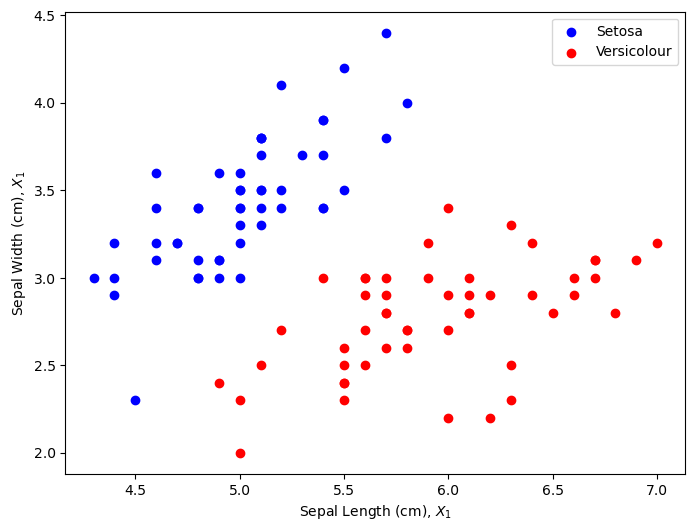

In [24]:
# Importing,
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Loading dataset,
iris = load_iris()
X = iris["data"][:, 0:2] # <-- We want only two features.
y = iris["target"]

# We also only want to consider two classes,
y_1_idxs, y_2_idxs = np.where(y == 0)[0], np.where(y == 1)[0]
X_class_1, X_class_2 = X[y_1_idxs], X[y_2_idxs]

# Constructing new (unshuffled) dataset,
X_new = np.concatenate((X_class_1, X_class_2), axis=0)
y_1, y_2 = np.zeros(shape=y_1_idxs.shape), np.ones(shape=y_2_idxs.shape)
y_new = np.concatenate((y_1, y_2), axis=0)

# Creating data split, 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42, shuffle=True)

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X_class_1.T[0], X_class_1.T[1], color="blue", label="Setosa")
plt.scatter(X_class_2.T[0], X_class_2.T[1], color="red", label="Versicolour")
plt.xlabel("Sepal Length (cm), $X_1$")
plt.ylabel("Sepal Width (cm), $X_1$")
plt.legend()
plt.show()

Now we employ our implementation of SVC,

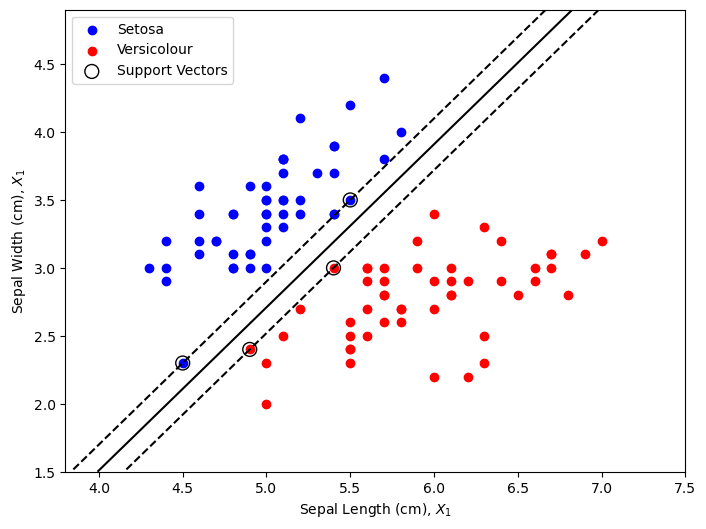

In [30]:
# Fitting the model,
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X_class_1.T[0], X_class_1.T[1], color="blue", label="Setosa")
plt.scatter(X_class_2.T[0], X_class_2.T[1], color="red", label="Versicolour")
plt.xlabel("Sepal Length (cm), $X_1$")
plt.ylabel("Sepal Width (cm), $X_1$")

# Support vectors,
plt.scatter(clf.X[clf.sv_idxs, 0], clf.X[clf.sv_idxs, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Creating grid to evaluate model,
x_min, x_max = X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5
y_min, y_max = X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5
xx = np.linspace(x_min, x_max, 500)
yy = np.linspace(y_min, y_max, 500)
XX, YY = np.meshgrid(xx, yy)

# Computing decision function for each point in the grid,
Z = (clf.weights[0] * XX + clf.weights[1] * YY + clf.bias)

plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.legend(loc="upper left")
plt.show()

The object representation of _SVC_ provides useful diagnostics. We see that in case, an admittedly simple example, our SVC achieves a 100% classification accuracy on the training data.

In [26]:
clf

Our implementation produces the same solution as sci-kit learn's,

weights: [ 6.3154899  -5.26238666], bias: -17.316424920734285
Score: 1.0


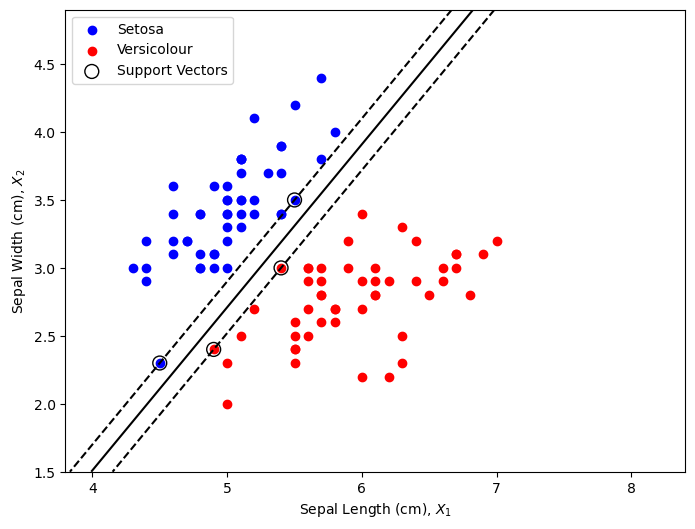

In [ ]:
# Importing,
from sklearn.svm import SVC as SKSVC

# Fitting model,
sk_clf = SKSVC(kernel="linear", C=10e15) # <-- Approximating a hard-margin.
sk_clf.fit(X_train, y_train)

# Extracting model parameters,
w, b = sk_clf.coef_[0], sk_clf.intercept_[0]
print(f"weights: {w}, bias: {b}")
print("Score:", sk_clf.score(X_test, y_test)) #<-- Scoring model.

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue", label="Setosa")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red", label="Versicolour")
plt.xlabel("Sepal Length (cm), $X_1$")
plt.ylabel("Sepal Width (cm), $X_2$")

# Support vectors,
plt.scatter(
    sk_clf.support_vectors_[:, 0],
    sk_clf.support_vectors_[:, 1],
    s=100, facecolors='none', edgecolors='k',
    label="Support Vectors"
)

# Creating grid,
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Creating the decision function,
Z = sk_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary and margins,
plt.contour(xx, yy, Z, levels=[-1, 0, 1],
            linestyles=['--', '-', '--'], colors='k')
plt.legend(loc="upper left")
plt.show()

### References

https://www.youtube.com/watch?v=_PwhiWxHK8o

https://www.youtube.com/watch?v=vqoVIchkM7I

https://cvxopt.org/userguide/coneprog.html?highlight=cvxopt%20solvers%20qp

kernels: https://www.youtube.com/watch?v=OKFMZQyDROI